<a href="https://colab.research.google.com/github/faranbutt/Machine-Learing-MIPT/blob/main/Logistic_Regression_from_Scratch(Concepts).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import sklearn
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from sklearn import datasets
digits = datasets.load_digits()
X,Y = digits.images, digits.target

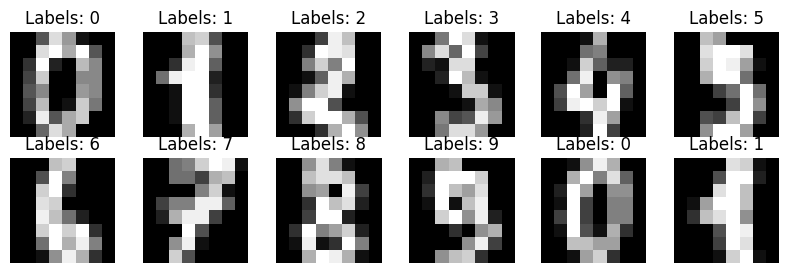

In [4]:
fig,axes = plt.subplots(2,6,figsize=(10,3))
for i,ax in enumerate(axes.flat):
  ax.imshow(X[i],cmap='gray')
  ax.set_title(f'Labels: {Y[i]}')
  ax.axis('off')
plt.show()

In [5]:
n, x,y = X.shape
X = X.reshape((n,x*y))
X.shape

(1797, 64)

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator,ClassifierMixin

In [7]:
class LogisticRegression(BaseEstimator, ClassifierMixin):
  def __init__(self,lr=0.01,n_iter=1000):
    self.lr = lr
    self.n_iter = n_iter
    self.w = None
    self.b = None

  def _linear_model(self,X):
    return np.dot(X,self.w) + self.b

  def _sigmoid(self,X):
    return 1/(1+np.exp(-X))

  def fit(self,X,y):
    n_samples,n_features = X.shape
    self.w = np.zeros(n_features)
    self.b = 0

    for _ in range(self.n_iter):
      y_predicted = self._sigmoid(self._linear_model(X))
      dw = (1/n_samples) * np.dot(X.T,(y_predicted-y))
      db = (1/n_samples) * np.sum(y_predicted-y)

      self.w -= self.lr * dw
      self.b -= self.lr * db
  def predict_probability(self,X):
    return self._sigmoid(self._linear_model(X))

  def predict(self,X):
    y_predicted_probs = self.predict_probability(X)
    y_predicted = [1 if i > 0.5 else 0 for i in y_predicted_probs]
    return np.array(y_predicted)

In [8]:
flags = (Y==0) | (Y==1)
x_binary,y_binary = X[flags], Y[flags]
x_binary.shape,y_binary.shape

((360, 64), (360,))

In [9]:
x_train,x_test,y_train,y_test = train_test_split(x_binary,y_binary)
x_train.shape,x_test.shape

((270, 64), (90, 64))

In [10]:
x_test += np.random.normal(0,100,x_test.shape)
x_train += np.random.normal(0,100,x_train.shape)

In [11]:
from sklearn.metrics import classification_report
lr = LogisticRegression()
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.61      0.57      0.59        47
           1       0.57      0.60      0.58        43

    accuracy                           0.59        90
   macro avg       0.59      0.59      0.59        90
weighted avg       0.59      0.59      0.59        90



# ROC Curve

$TPR$ (Recall) = $\frac{TP}{TP+FN}$

$FPR = \frac{FP}{FP + TN}$


In [12]:
def estimate_roc_curve(y_true,y_scores,n_thresholds=100):
   thresholds = np.linspace(0,1,n_thresholds)
   tpr = np.zeros(n_thresholds)
   fpr = np.zeros(n_thresholds)

   for i,threshold in enumerate(thresholds):
    y_pred = (y_scores >= threshold).astype(int)


    TP = np.sum((y_true == 1) & (y_pred == 1))
    FP = np.sum((y_true == 0) & (y_pred == 1))
    TN = np.sum((y_true == 0) & (y_pred == 0))
    FN = np.sum((y_true == 1) & (y_pred == 0))

    tpr[i] = TP / (TP+FN) if (TP + FN) > 0 else 0
    fpr[i] = FP / (FP+TN) if (FP + TN) > 0 else 0

   return tpr,fpr,thresholds



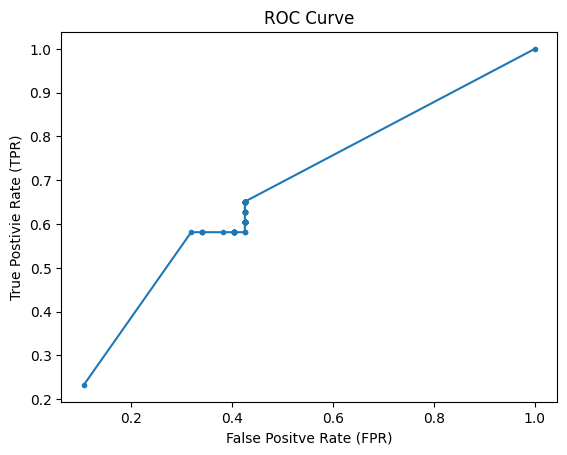

In [13]:
y_pred_prob = lr.predict_probability(x_test)
fpr, tpr, thresholds = estimate_roc_curve(y_test,y_pred_prob)

plt.plot(tpr,fpr,marker='.')
plt.xlabel("False Positve Rate (FPR)")
plt.ylabel("True Postivie Rate (TPR)")
plt.title("ROC Curve")
plt.show()

In [14]:
def estimate_roc_curve(y_true,y_scores):
   thresholds = np.unique(np.sort(y_scores))
   n_thresholds = len(thresholds)
   tpr = np.zeros(n_thresholds)
   fpr = np.zeros(n_thresholds)

   for i,threshold in enumerate(thresholds):
    y_pred = (y_scores >= threshold).astype(int)


    TP = np.sum((y_true == 1) & (y_pred == 1))
    FP = np.sum((y_true == 0) & (y_pred == 1))
    TN = np.sum((y_true == 0) & (y_pred == 0))
    FN = np.sum((y_true == 1) & (y_pred == 0))

    tpr[i] = TP / (TP+FN) if (TP + FN) > 0 else 0
    fpr[i] = FP / (FP+TN) if (FP + TN) > 0 else 0

   return tpr,fpr,thresholds

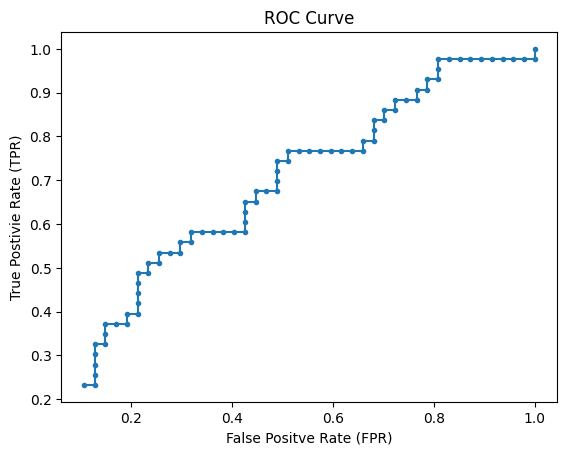

In [15]:
y_predi = lr.predict_probability(x_test)
fpr,tpr,thresholds = estimate_roc_curve(y_test,y_predi)
plt.plot(tpr,fpr,marker='.')
plt.xlabel("False Positve Rate (FPR)")
plt.ylabel("True Postivie Rate (TPR)")
plt.title("ROC Curve")
plt.show()

# Logistic Regression (Multiclass Classification)


In [48]:
from sklearn import datasets
digits = datasets.load_digits()
X,Y = digits.images, digits.target


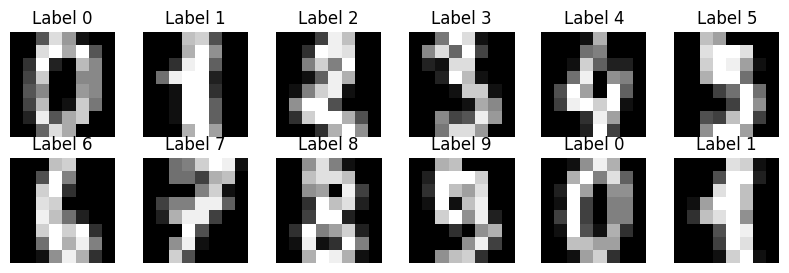

In [49]:
fig,axes = plt.subplots(2,6,figsize=(10,3))
for i,ax in enumerate(axes.flat):
  ax.imshow(X[i],cmap='gray')
  ax.set_title(f"Label {Y[i]}")
  ax.axis('off')
plt.show()

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

In [51]:
n,x,y = X.shape
X = X.reshape((n,x*y))
X.shape

(1797, 64)

In [60]:
x_train,x_test,y_train,y_test = train_test_split(X,Y)
x_train += np.random.normal(x_train,10)
x_test += np.random.normal(x_test,10)
lr = LogisticRegression(solver='sag',penalty=None)
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.90      0.92        39
           1       0.68      0.78      0.73        46
           2       0.82      0.74      0.78        42
           3       0.80      0.78      0.79        50
           4       0.83      0.81      0.82        54
           5       0.87      0.85      0.86        48
           6       0.85      1.00      0.92        40
           7       0.80      0.84      0.82        43
           8       0.80      0.62      0.70        39
           9       0.75      0.78      0.76        49

    accuracy                           0.81       450
   macro avg       0.81      0.81      0.81       450
weighted avg       0.81      0.81      0.81       450



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


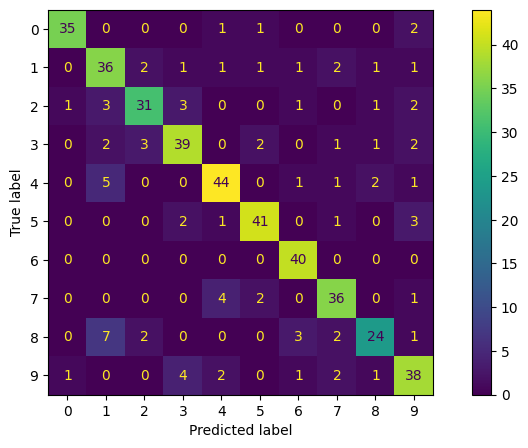

In [63]:
from sklearn.metrics import ConfusionMatrixDisplay
fig,ax = plt.subplots(figsize=(10,5))
ConfusionMatrixDisplay.from_predictions(y_test,y_pred,ax = ax)